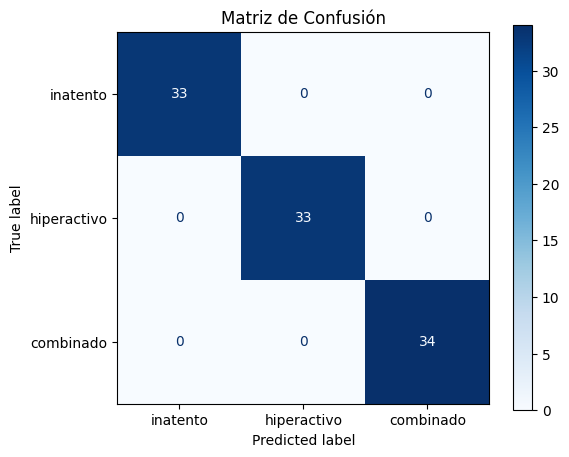

/var/folders/66/bstyy5s97hs84d2wwr3vtp_80000gn/T/ipykernel_26572/3137119736.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia.head(10), x="Importancia", y="Pregunta", palette="viridis")


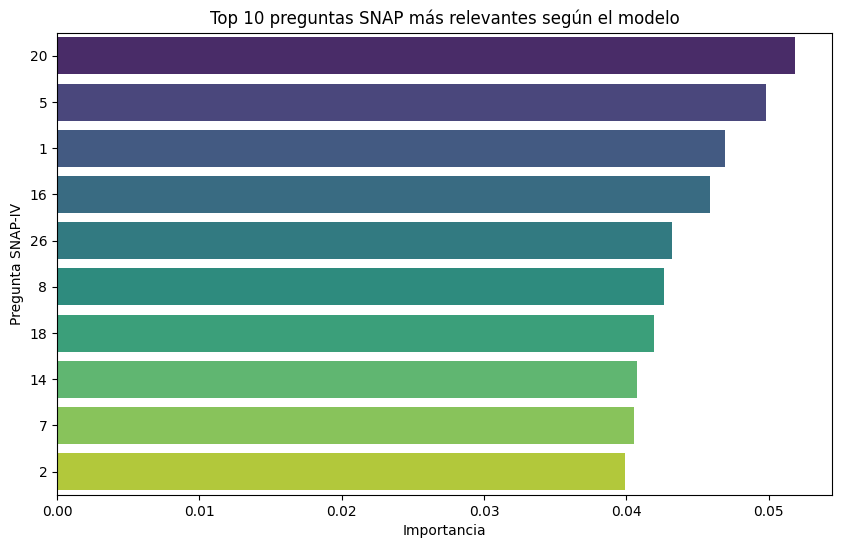

In [3]:
# 📌 notebook/03_evaluacion.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

# Cargar el modelo
modelo = joblib.load("../models/modelo_perfil.pkl")

# Cargar el dataset original
df = pd.read_csv("../data/snap_dataset_labeled.csv")
X = df.iloc[:, 1:27]
y_true = df["profile"]

# Predicción completa
y_pred = modelo.predict(X)

# 📊 MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_true, y_pred, labels=["inatento", "hiperactivo", "combinado"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["inatento", "hiperactivo", "combinado"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

# 🔍 IMPORTANCIA DE VARIABLES (preguntas)
importancias = modelo.feature_importances_
features = list(map(str, range(1, 27)))

df_importancia = pd.DataFrame({
    "Pregunta": features,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

# 📈 Visualizar las más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia.head(10), x="Importancia", y="Pregunta", palette="viridis")
plt.title("Top 10 preguntas SNAP más relevantes según el modelo")
plt.xlabel("Importancia")
plt.ylabel("Pregunta SNAP-IV")
plt.show()